# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [3]:
# Load pickled data
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as im
%matplotlib inline
import tensorflow as tf
import time
from datetime import timedelta
import math

# TODO: fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [7]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

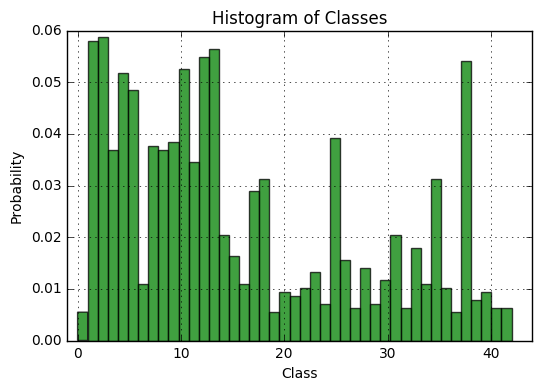

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# First let's plot a histogram of the classes
n, bins, patches = plt.hist(y_train, 43, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Histogram of Classes')
plt.axis([-1, 44, 0, 0.06])
plt.grid(True)
plt.show()

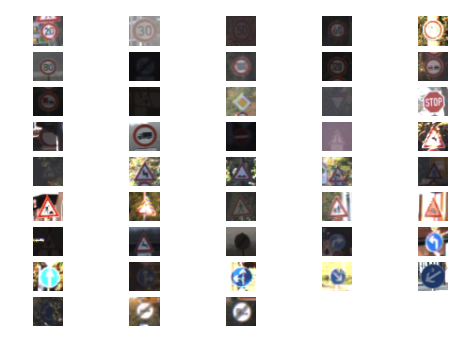

In [9]:
# Next let's plot one image from each class
# Making a 9 x 5 grid (43 classes)
tmp,example_images = np.unique(y_train,return_index=True)
#print(len(example_images))
#stop
for i in range(len(example_images)):
    plt.subplot(9, 5, i+1)
    tmp = plt.imshow(X_train[example_images[i]+1])
    plt.axis('off')
    
plt.show()

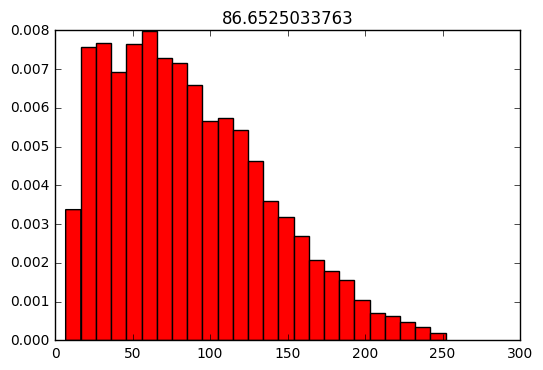

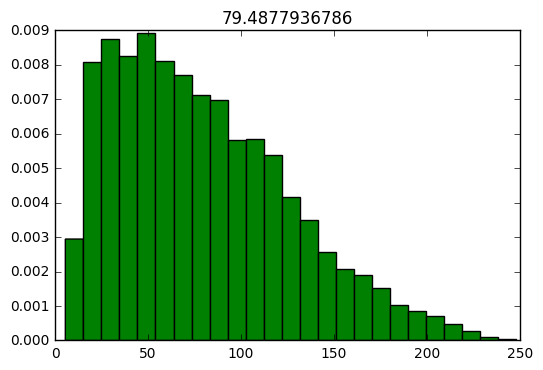

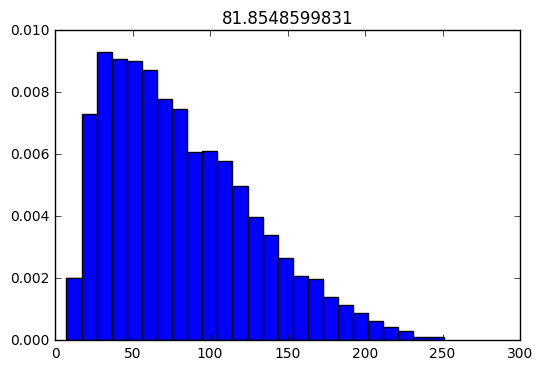

In [10]:
# Let's also get the dominant colors
r_train = np.zeros((n_train))
g_train = np.zeros((n_train))
b_train = np.zeros((n_train))

for i in range(0,n_train):
    r_train[i]=np.mean(X_train[i,:,:,0])
    g_train[i]=np.mean(X_train[i,:,:,1])
    b_train[i]=np.mean(X_train[i,:,:,2])

plt.hist(r_train, 25, normed=1, facecolor='red')
plt.title(np.mean(r_train))
plt.show()    

plt.hist(g_train, 25, normed=1, facecolor='green')
plt.title(np.mean(g_train))
plt.show()    

plt.hist(b_train, 25, normed=1, facecolor='blue')
plt.title(np.mean(b_train))
plt.show()